<a href="https://colab.research.google.com/github/ahsanzubair172/2nd-/blob/main/body-performance-using-multi-class-algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*_Resultant_*

*Decision Tree*
*RandomForestClassifier,ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier*
*KNeighborsClassifier,MLPClassifier , LGBMClassifier,XGBClassifier*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
# from bayes_opt import bayesian_optimization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('/content/sample_data/bodyPerformance.csv')

In [4]:
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [7]:
df.shape

(13393, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [9]:
df.describe(include='all')
df.describe ()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [10]:
df.isnull().sum()

,0
age,0
gender,0
height_cm,0
weight_kg,0
body fat_%,0
diastolic,0
systolic,0
gripForce,0
sit and bend forward_cm,0
sit-ups counts,0


In [11]:
df.groupby(['class']).size()

,0
class,
A,3348
B,3347
C,3349
D,3349


In [12]:
print ('The number of unique values in age is:', df.age.nunique())
print (df.age.value_counts())

# df.groupby(['age']).size()

The number of unique values in age is: 44
age
21.0    964
22.0    789
23.0    668
25.0    644
26.0    629
24.0    617
27.0    546
28.0    527
29.0    407
30.0    374
60.0    368
31.0    338
37.0    282
32.0    275
62.0    265
61.0    254
39.0    243
36.0    239
38.0    230
63.0    230
34.0    229
33.0    229
35.0    223
41.0    217
64.0    215
40.0    211
56.0    197
48.0    196
59.0    192
43.0    192
51.0    191
50.0    189
55.0    185
45.0    183
46.0    181
57.0    181
58.0    180
42.0    179
47.0    172
44.0    172
49.0    163
54.0    152
52.0    140
53.0    135
Name: count, dtype: int64


In [13]:
df.groupby(['age']).count()

,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
age,,,,,,,,,,,
21.0,964,964,964,964,964,964,964,964,964,964,964
22.0,789,789,789,789,789,789,789,789,789,789,789
23.0,668,668,668,668,668,668,668,668,668,668,668
24.0,617,617,617,617,617,617,617,617,617,617,617
25.0,644,644,644,644,644,644,644,644,644,644,644
26.0,629,629,629,629,629,629,629,629,629,629,629
27.0,546,546,546,546,546,546,546,546,546,546,546
28.0,527,527,527,527,527,527,527,527,527,527,527
29.0,407,407,407,407,407,407,407,407,407,407,407


In [14]:
df.groupby(['gender']).size()

,0
gender,
F,4926
M,8467


In [15]:
df.groupby(['class']).size()

,0
class,
A,3348
B,3347
C,3349
D,3349


In [16]:


# Assuming 'df' is your DataFrame and it has 'gender' and 'class' columns
le_gender = LabelEncoder()
le_class = LabelEncoder()

# Fit and transform the 'gender' column
df['gender'] = le_gender.fit_transform(df['gender'])
gender_mapping = dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))

# Fit and transform the 'class' column
df['class'] = le_class.fit_transform(df['class'])
class_mapping = dict(zip(le_class.classes_, le_class.transform(le_class.classes_)))

# Display the mappings in a clear format
print("Gender Mapping:")
for original, encoded in gender_mapping.items():
    print(f"{original} -> {encoded}")

print("\nClass Mapping:")
for original, encoded in class_mapping.items():
    print(f"{original} -> {encoded}")


print ("\n######################################################\n\n")
# Check the DataFrame info to ensure the columns are encoded
print(df.info())

Gender Mapping:
F -> 0
M -> 1

Class Mapping:
A -> 0
B -> 1
C -> 2
D -> 3

######################################################


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  int64  
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  int64  
dty

In [17]:
print (df['gender'].value_counts())
print("\n",df['class'].value_counts())

gender
1    8467
0    4926
Name: count, dtype: int64

 class
2    3349
3    3349
0    3348
1    3347
Name: count, dtype: int64


male labeled as "1"
female labeled as "0"

A -> 0
B -> 1
C -> 2
D -> 3

In [18]:
X=df.drop('class',axis=1)
y=df['class']

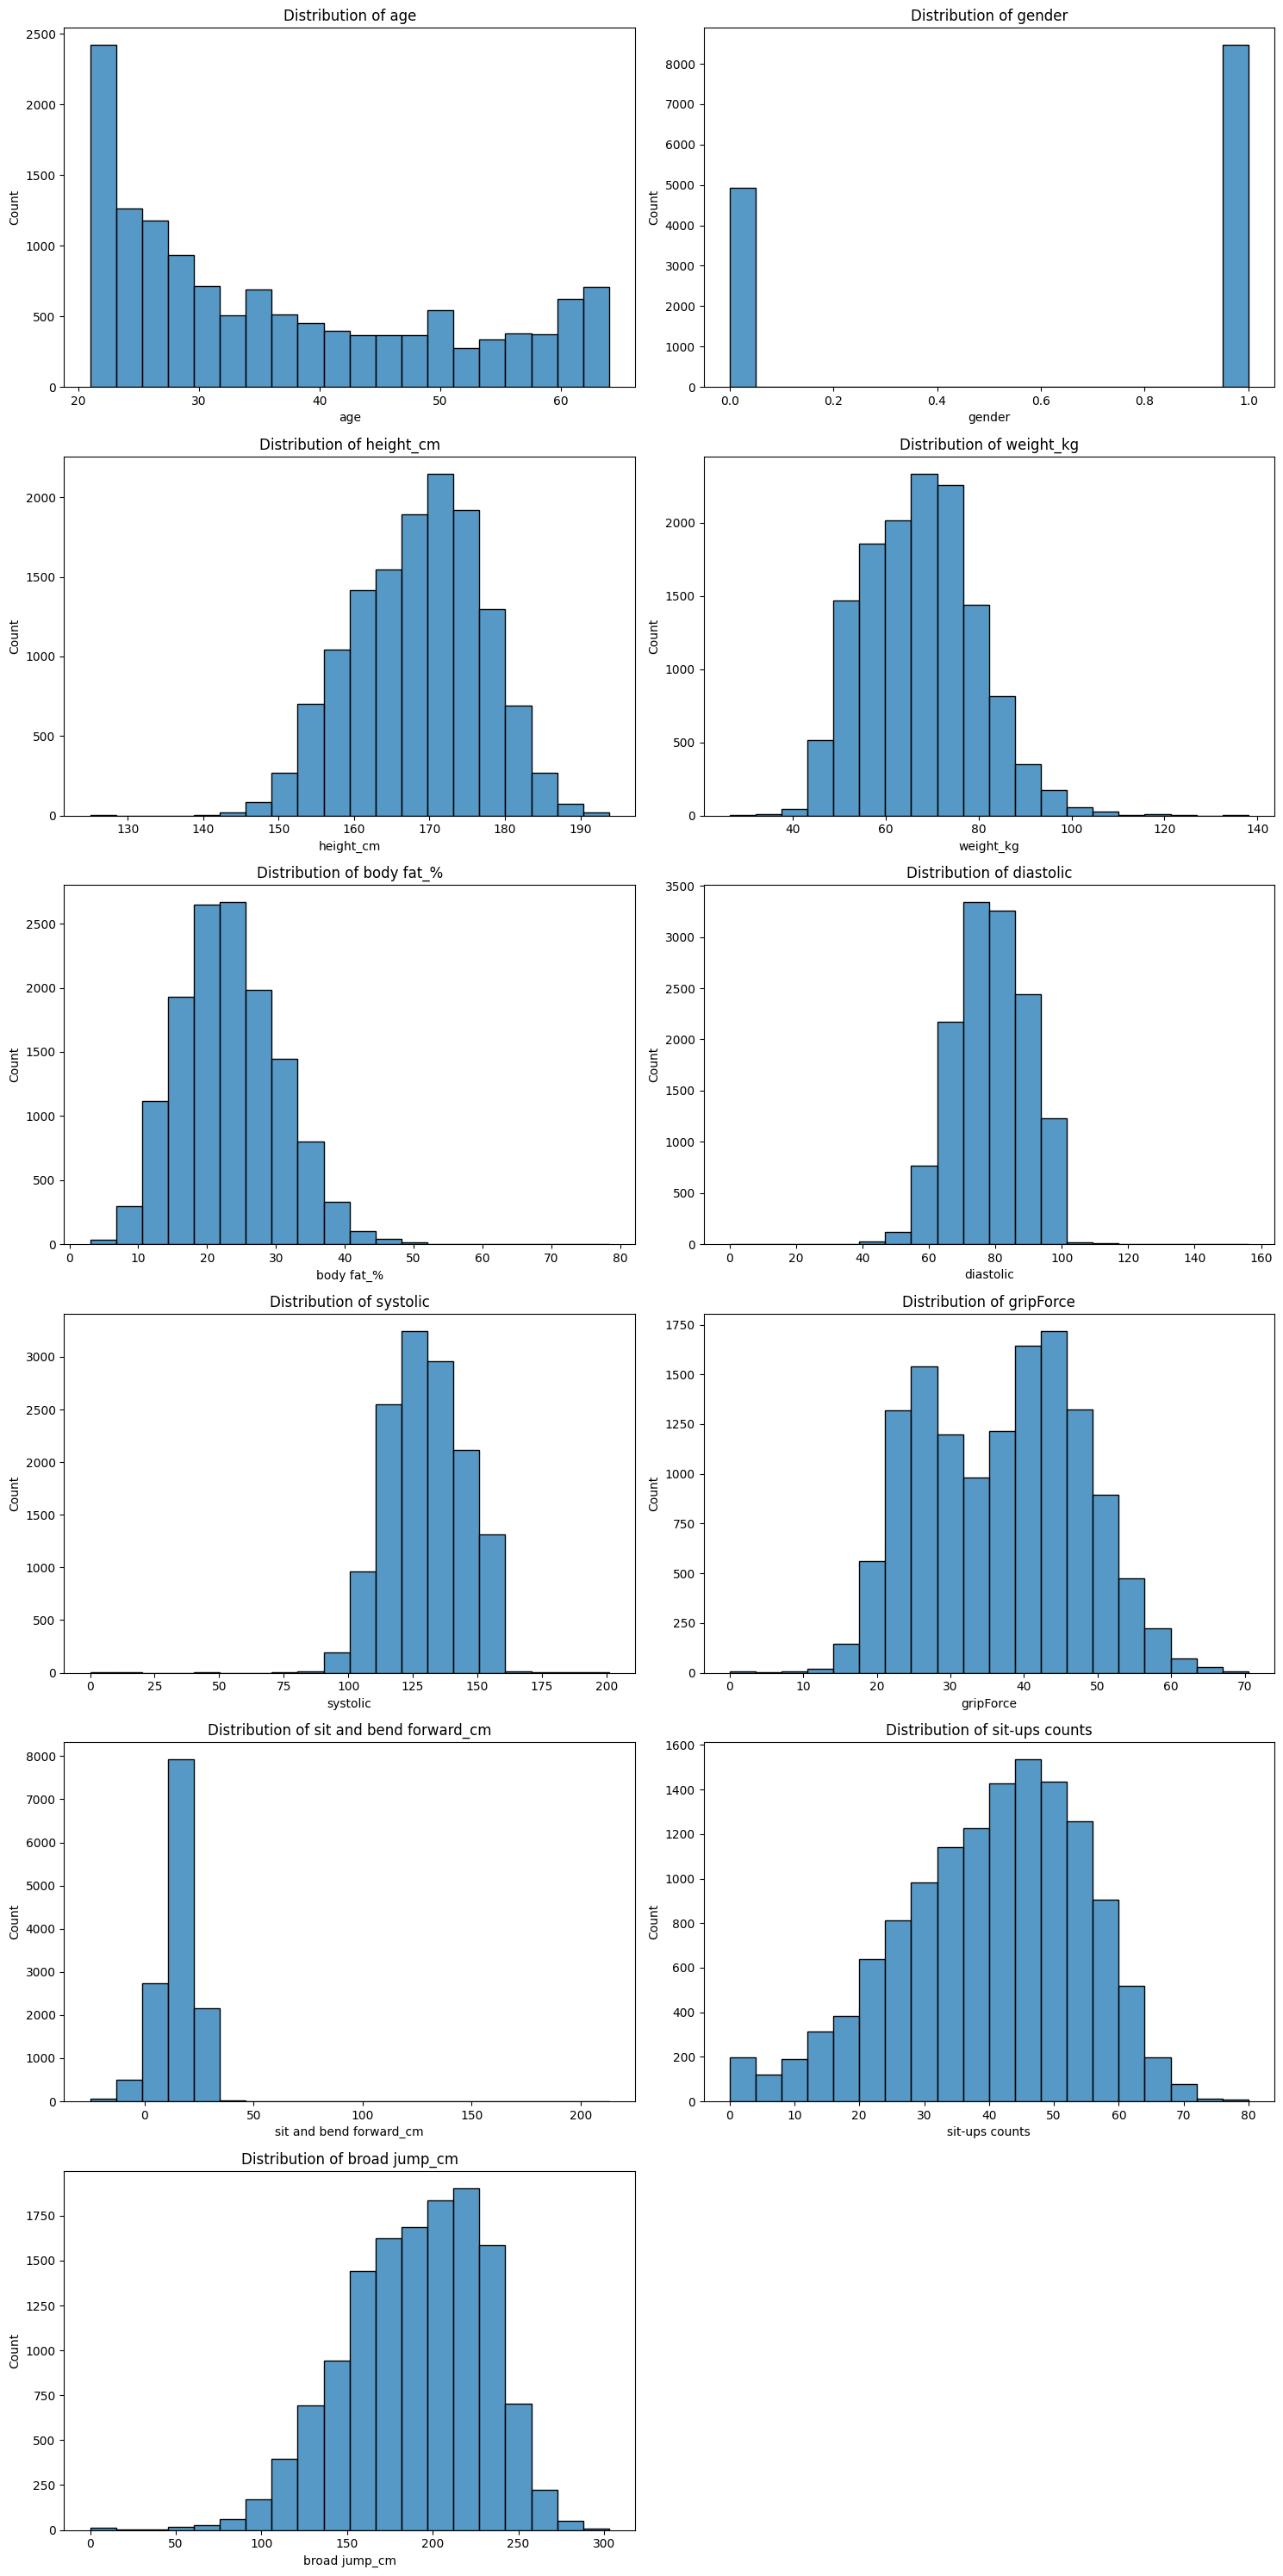

In [19]:
plt.figure(figsize=(15, 30))

for i, column in enumerate(X.columns):
    plt.subplot(6, 2, i+1)
    sns.histplot(data=df, x=column, bins=20)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [20]:
# print(X.shape)
# print(y.shape)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Convert the scaled data back to DataFrame for consistency
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display the scaled data
print("Scaled Training Data:\n", X_train_scaled)
print("\n######################################################\n\n")
print("Scaled Test Data:\n", X_test_scaled)

Scaled Training Data:
             age    gender  height_cm  weight_kg  body fat_%  diastolic  \
0     -0.050166 -1.315047  -1.926133  -1.674047    0.841188  -1.455195   
1     -0.492543  0.760429   0.001630   1.076106   -0.357107   0.119963   
2      1.424423  0.760429   0.691817   0.424094   -0.343333   1.787778   
3      1.866800 -1.315047  -1.224046  -0.721106    0.703453   0.119963   
4     -0.787461  0.760429  -0.141167   0.666509    1.171752   0.861214   
...         ...       ...        ...        ...         ...        ...   
10039  0.392211 -1.315047  -1.747637  -1.448350    2.301179  -0.250662   
10040  0.392211 -1.315047  -0.736156  -0.562283    0.111193  -1.177225   
10041 -1.156108  0.760429   0.822715   0.942360   -1.211064  -1.177225   
10042 -0.787461  0.760429   0.798915   0.215116   -0.536162   1.787778   
10043 -0.787461  0.760429   0.798915   0.315426   -1.087102   0.768558   

       systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
0     -1.636862  

*Decision Tree*__1



Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


 Cross-Validation Scores: [0.67297163 0.66002987 0.66699851 0.66401195 0.64940239]
Mean Cross-Validation Score: 0.6626828673360317


######################################################



Decision Tree with GridSearchCV

Accuracy:  0.6703493580173187
Precision:  0.6791029978456713
Recall:  0.6703849125898552
F1 Score:  0.6695082024174734
ROC AUC Score:  0.8660574745631632

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.84      0.74       837
           1       0.54      0.55      0.54       837
           2       0.64      0.55      0.59       838
           3       0.88      0.74      0.80       837

    accuracy                           0.67      3349
   macro avg       0.68      0.67      0.67      3349
weighted avg       0.68      0.67      0.67      3349

Confusion Matrix:
 [[707  88  39   3]
 [253 460  94  30]
 [ 90 233 462  53]

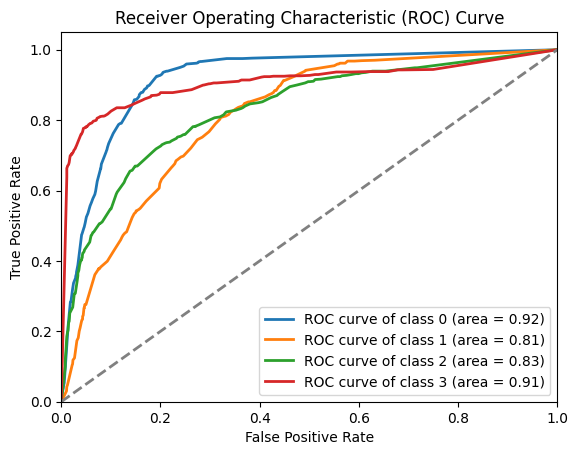

In [23]:
# Define the parameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_dt = grid_search.best_estimator_

print("\n\nBest Parameters:", best_params)

# Evaluate with cross-validation
cv_scores = cross_val_score(best_dt, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n\n Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Predict the class labels
dt_pred = best_dt.predict(X_test_scaled)

# Predict the probabilities
dt_pred_proba = best_dt.predict_proba(X_test_scaled)

# Print evaluation metrics
print("\n\n######################################################\n\n")
print("\nDecision Tree with GridSearchCV\n")
print('Accuracy: ', accuracy_score(y_test, dt_pred))
print('Precision: ', precision_score(y_test, dt_pred, average='macro'))
print('Recall: ', recall_score(y_test, dt_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, dt_pred, average='macro'))
print('ROC AUC Score: ', roc_auc_score(y_test, dt_pred_proba, multi_class='ovr'))
print('\nClassification Report:\n', classification_report(y_test, dt_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, dt_pred))

# Plot ROC Curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(set(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, dt_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, dt_pred_proba[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

*Decision Tree Classifier*

Decision Tree

Accuracy:  0.6437742609734249
Precision:  0.6422649770063273
Recall:  0.6437979572458747
F1 Score:  0.6429747598202888
ROC AUC Score:  0.7625269551757863

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69       837
           1       0.53      0.52      0.53       837
           2       0.57      0.56      0.57       838
           3       0.78      0.79      0.78       837

    accuracy                           0.64      3349
   macro avg       0.64      0.64      0.64      3349
weighted avg       0.64      0.64      0.64      3349

Confusion Matrix:
 [[584 164  76  13]
 [178 438 172  49]
 [ 77 163 473 125]
 [ 18  54 104 661]]


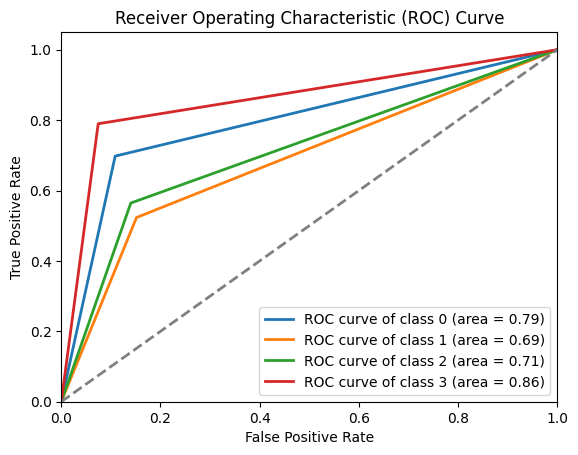

In [24]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred_proba = dt.predict_proba(X_test)
print("Decision Tree\n")
print('Accuracy: ', accuracy_score(y_test, dt_pred))
print('Precision: ', precision_score(y_test, dt_pred, average='macro'))
print('Recall: ', recall_score(y_test, dt_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, dt_pred, average='macro'))
print('ROC AUC Score: ', roc_auc_score(y_test, dt_pred_proba, multi_class='ovr'))
print('\nClassification Report:\n', classification_report(y_test, dt_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, dt_pred))
# Plot ROC Curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(set(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, dt_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, dt_pred_proba[:, i])
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


*Decision Tree Classifier*



Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


 Cross-Validation Scores: [0.67446491 0.66202091 0.66799403 0.66401195 0.64890438]
Mean Cross-Validation Score: 0.663479233885761


######################################################



Decision Tree with GridSearchCV

Accuracy:  0.6700507614213198
Precision:  0.6786821416144447
Recall:  0.6700862268072985
F1 Score:  0.6691833705518668
ROC AUC Score:  0.867008237062339

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.84      0.74       837
           1       0.54      0.55      0.54       837
           2       0.64      0.55      0.59       838
           3       0.88      0.74      0.80       837

    accuracy                           0.67      3349
   macro avg       0.68      0.67      0.67      3349
weighted avg       0.68      0.67      0.67      3349

Confusion Matrix:
 [[707  88  39   3]
 [253 459  95  30]
 [ 90 233 462  53]
 

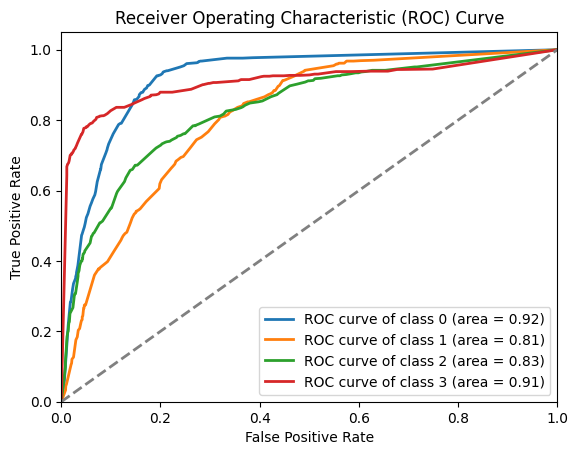

In [25]:
# Define the parameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_dt = grid_search.best_estimator_

print("\n\nBest Parameters:", best_params)

# Evaluate with cross-validation
cv_scores = cross_val_score(best_dt, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n\n Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Predict the class labels
dt_pred = best_dt.predict(X_test_scaled)

# Predict the probabilities
dt_pred_proba = best_dt.predict_proba(X_test_scaled)

# Print evaluation metrics
print("\n\n######################################################\n\n")
print("\nDecision Tree with GridSearchCV\n")
print('Accuracy: ', accuracy_score(y_test, dt_pred))
print('Precision: ', precision_score(y_test, dt_pred, average='macro'))
print('Recall: ', recall_score(y_test, dt_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, dt_pred, average='macro'))
print('ROC AUC Score: ', roc_auc_score(y_test, dt_pred_proba, multi_class='ovr'))
print('\nClassification Report:\n', classification_report(y_test, dt_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, dt_pred))

# Plot ROC Curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(set(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, dt_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, dt_pred_proba[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

*Random Forest*__2

In [ ]:


# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [3, 5, 7, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print("\n\nBest Parameters:", best_params)

# Evaluate with cross-validation
cv_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n\n Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Predict the class labels
rf_pred = best_rf.predict(X_test_scaled)

# Predict the probabilities
rf_pred_proba = best_rf.predict_proba(X_test_scaled)

# Print evaluation metrics
print("\n\n######################################################\n\n")
print("\nRandom Forest with GridSearchCV\n")
print('Accuracy: ', accuracy_score(y_test, rf_pred))
print('Precision: ', precision_score(y_test, rf_pred, average='macro'))
print('Recall: ', recall_score(y_test, rf_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, rf_pred, average='macro'))
print('ROC AUC Score: ', roc_auc_score(y_test, rf_pred_proba, multi_class='ovr'))
print('\nClassification Report:\n', classification_report(y_test, rf_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_pred))

# Plot ROC Curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(set(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, rf_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, rf_pred_proba[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

*Extra Trees*__3

In [ ]:


# Define the parameter grid for Extra Trees
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [3, 5, 7, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Extra Trees model
et = ExtraTreesClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=et, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_et = grid_search.best_estimator_

print("\n\nBest Parameters:", best_params)

# Evaluate with cross-validation
cv_scores = cross_val_score(best_et, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n\n Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Predict the class labels
et_pred = best_et.predict(X_test_scaled)

# Predict the probabilities
et_pred_proba = best_et.predict_proba(X_test_scaled)

# Print evaluation metrics
print("\n\n######################################################\n\n")
print("\nExtra Trees with GridSearchCV\n")
print('Accuracy: ', accuracy_score(y_test, et_pred))
print('Precision: ', precision_score(y_test, et_pred, average='macro'))
print('Recall: ', recall_score(y_test, et_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, et_pred, average='macro'))
print('ROC AUC Score: ', roc_auc_score(y_test, et_pred_proba, multi_class='ovr'))
print('\nClassification Report:\n', classification_report(y_test, et_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, et_pred))

# Plot ROC Curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(set(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, et_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, et_pred_proba[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

*Ada Boost*__4

In [ ]:

# Define the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 1, 10],  # Learning rate shrinks the contribution of each classifier
    'estimator__max_depth': [1, 2, 3, 4]  # Maximum depth of the base estimator (Decision Tree)
}

# Initialize the AdaBoost model with a Decision Tree as the base estimator
base_estimator = DecisionTreeClassifier()
ada = AdaBoostClassifier(estimator=base_estimator)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_ada = grid_search.best_estimator_

print("\n\nBest Parameters:", best_params)

# Evaluate with cross-validation
cv_scores = cross_val_score(best_ada, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n\n Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Predict the class labels
ada_pred = best_ada.predict(X_test_scaled)

# Predict the probabilities
ada_pred_proba = best_ada.predict_proba(X_test_scaled)

# Print evaluation metrics
print("\n\n######################################################\n\n")
print("\nAdaBoost with GridSearchCV\n")
print('Accuracy: ', accuracy_score(y_test, ada_pred))
print('Precision: ', precision_score(y_test, ada_pred, average='macro'))
print('Recall: ', recall_score(y_test, ada_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, ada_pred, average='macro'))
print('ROC AUC Score: ', roc_auc_score(y_test, ada_pred_proba, multi_class='ovr'))
print('\nClassification Report:\n', classification_report(y_test, ada_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, ada_pred))

# Plot ROC Curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(set(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, ada_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, ada_pred_proba[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


*Gradient Bossting*__5

In [ ]:

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5, 6]  # Maximum depth of the individual trees
}

# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_gb = grid_search.best_estimator_

print("\n\nBest Parameters:", best_params)

# Evaluate with cross-validation
cv_scores = cross_val_score(best_gb, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n\n Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Predict the class labels
gb_pred = best_gb.predict(X_test_scaled)

# Predict the probabilities
gb_pred_proba = best_gb.predict_proba(X_test_scaled)

# Print evaluation metrics
print("\n\n######################################################\n\n")
print("\nGradient Boosting with GridSearchCV\n")
print('Accuracy: ', accuracy_score(y_test, gb_pred))
print('Precision: ', precision_score(y_test, gb_pred, average='macro'))
print('Recall: ', recall_score(y_test, gb_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, gb_pred, average='macro'))
print('ROC AUC Score: ', roc_auc_score(y_test, gb_pred_proba, multi_class='ovr'))
print('\nClassification Report:\n', classification_report(y_test, gb_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, gb_pred))

# Plot ROC Curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(set(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, gb_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, gb_pred_proba[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

*SVM*__6

In [ ]:

# Define the parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Kernel type
}

# Initialize the SVC model
svc = SVC(probability=True)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_svc = grid_search.best_estimator_

print("\n\nBest Parameters:", best_params)

# Evaluate with cross-validation
cv_scores = cross_val_score(best_svc, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n\n Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Predict the class labels
svc_pred = best_svc.predict(X_test_scaled)

# Predict the probabilities
svc_pred_proba = best_svc.predict_proba(X_test_scaled)

# Print evaluation metrics
print("\n\n######################################################\n\n")
print("\nSupport Vector Classifier with GridSearchCV\n")
print('Accuracy: ', accuracy_score(y_test, svc_pred))
print('Precision: ', precision_score(y_test, svc_pred, average='macro'))
print('Recall: ', recall_score(y_test, svc_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, svc_pred, average='macro'))
print('ROC AUC Score: ', roc_auc_score(y_test, svc_pred_proba, multi_class='ovr'))
print('\nClassification Report:\n', classification_report(y_test, svc_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, svc_pred))

# Plot ROC Curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(set(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, svc_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, svc_pred_proba[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

*KNeighborsClassifier*__7

In [ ]:

# Define the parameter grid for KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric to use
}

# Initialize the KNeighborsClassifier model
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

print("\n\nBest Parameters:", best_params)

# Evaluate with cross-validation
cv_scores = cross_val_score(best_knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n\n Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Predict the class labels
knn_pred = best_knn.predict(X_test_scaled)

# Predict the probabilities
knn_pred_proba = best_knn.predict_proba(X_test_scaled)

# Print evaluation metrics
print("\n\n######################################################\n\n")
print("\nk-Nearest Neighbors with GridSearchCV\n")
print('Accuracy: ', accuracy_score(y_test, knn_pred))
print('Precision: ', precision_score(y_test, knn_pred, average='macro'))
print('Recall: ', recall_score(y_test, knn_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, knn_pred, average='macro'))
print('ROC AUC Score: ', roc_auc_score(y_test, knn_pred_proba, multi_class='ovr'))
print('\nClassification Report:\n', classification_report(y_test, knn_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, knn_pred))

# Plot ROC Curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(set(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, knn_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, knn_pred_proba[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

*Multilayer perceptron (MLPClassifier)__8

In [ ]:

# Define the parameter grid for MLPClassifier
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Number of neurons in the hidden layers
    'activation': ['tanh', 'relu'],  # Activation function for the hidden layer
    'solver': ['sgd', 'adam'],  # Solver for weight optimization
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization term) parameter
    'learning_rate': ['constant', 'adaptive']  # Learning rate schedule for weight updates
}

# Initialize the MLPClassifier model
mlp = MLPClassifier(max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_mlp = grid_search.best_estimator_

print("\n\nBest Parameters:", best_params)

# Evaluate with cross-validation
cv_scores = cross_val_score(best_mlp, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n\n Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Predict the class labels
mlp_pred = best_mlp.predict(X_test_scaled)

# Predict the probabilities
mlp_pred_proba = best_mlp.predict_proba(X_test_scaled)

# Print evaluation metrics
print("\n\n######################################################\n\n")
print("\nMulti-layer Perceptron with GridSearchCV\n")
print('Accuracy: ', accuracy_score(y_test, mlp_pred))
print('Precision: ', precision_score(y_test, mlp_pred, average='macro'))
print('Recall: ', recall_score(y_test, mlp_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, mlp_pred, average='macro'))
print('ROC AUC Score: ', roc_auc_score(y_test, mlp_pred_proba, multi_class='ovr'))
print('\nClassification Report:\n', classification_report(y_test, mlp_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, mlp_pred))

# Plot ROC Curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(set(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, mlp_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, mlp_pred_proba[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

*XGBClassifier*__9

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter grid for XGBClassifier
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Learning rate
    'max_depth': [5, 6,7,8, ],  # Maximum depth of a tree
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}

# Initialize the XGBClassifier model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_xgb = grid_search.best_estimator_

print("\n\nBest Parameters:", best_params)

# Evaluate with cross-validation
cv_scores = cross_val_score(best_xgb, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n\n Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Predict the class labels
xgb_pred = best_xgb.predict(X_test_scaled)

# Predict the probabilities
xgb_pred_proba = best_xgb.predict_proba(X_test_scaled)

# Print evaluation metrics
print("\n\n######################################################\n\n")
print("\nXGBoost with GridSearchCV\n")
print('Accuracy: ', accuracy_score(y_test, xgb_pred))
print('Precision: ', precision_score(y_test, xgb_pred, average='macro'))
print('Recall: ', recall_score(y_test, xgb_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, xgb_pred, average='macro'))
print('ROC AUC Score: ', roc_auc_score(y_test, xgb_pred_proba, multi_class='ovr'))
print('\nClassification Report:\n', classification_report(y_test, xgb_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, xgb_pred))

# Plot ROC Curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(set(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, xgb_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, xgb_pred_proba[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

*LGBMClassifier*__10

In [ ]:


# Define the parameter grid for LGBMClassifier
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Learning rate
    'max_depth': [5, 6, 7, 8],  # Maximum depth of a tree
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}

# Initialize the LGBMClassifier model
lgbm = LGBMClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_lgbm = grid_search.best_estimator_

print("\n\nBest Parameters:", best_params)

# Evaluate with cross-validation
cv_scores = cross_val_score(best_lgbm, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n\n Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Predict the class labels
lgbm_pred = best_lgbm.predict(X_test_scaled)

# Predict the probabilities
lgbm_pred_proba = best_lgbm.predict_proba(X_test_scaled)

# Print evaluation metrics
print("\n\n######################################################\n\n")
print("\nLightGBM with GridSearchCV\n")
print('Accuracy: ', accuracy_score(y_test, lgbm_pred))
print('Precision: ', precision_score(y_test, lgbm_pred, average='macro'))
print('Recall: ', recall_score(y_test, lgbm_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, lgbm_pred, average='macro'))
print('ROC AUC Score: ', roc_auc_score(y_test, lgbm_pred_proba, multi_class='ovr'))
print('\nClassification Report:\n', classification_report(y_test, lgbm_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, lgbm_pred))

# Plot ROC Curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(set(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, lgbm_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, lgbm_pred_proba[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()